# Запуск модели и сохранение полученных данных

In [2]:
import subprocess


def start_model(mode, height, width, n_preys, n_predators, seed):
    
    height = str(height)
    width = str(width)
    n_preys = str(n_preys)
    n_predators = str(n_predators)
    seed = str(seed)
    
    model = subprocess.run(["pp-model", mode, width, height, n_predators, n_preys, seed], stdout=subprocess.PIPE)
    return_code = model.returncode
    
    if mode == "L":
        
        filename = '%sx%s_%s_%s_%s.csv' % (width, height, n_predators, n_preys, seed)
        f = open(filename, 'r')
        
        predators = []
        preys = []

        for line in f:
            data = line.split(',')
            predators.append(int(data[1]))
            preys.append(int(data[2]))
        return predators, preys, return_code
    
    else:
        return return_code

predators, preys, steps = start_model("L", 200, 200, 3000, 3000, 13)

# Анализ данных и построение графика завсимости количества агентов в моделе от числа шагов

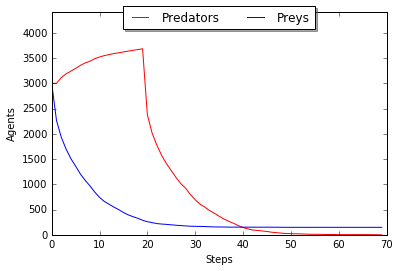

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.arange(0, steps + 1)
plt.plot(t, predators, "r", label="Predators")
plt.plot(t, preys, "b", label="Preys")
plt.ylim([0, max(predators + preys) * 1.2])
plt.ylabel("Agents")
plt.xlabel("Steps")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=2)
plt.show()

# Запуск модели с одинаковыми параметрами и разными псевдослучайными последовательностями, сбор информации о времени ее жизни

In [70]:
steps = []
for seed in range(0, 1000):
    steps.append(start_model("S", 200, 200, 3000, 3000, seed))

# Обработка полученных данных, построение гистограммы показывающей вероятность значений времени жизни модели  

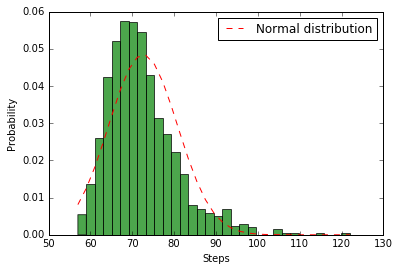

Maximum: 122 steps
Average: 72.577000 steps


In [71]:
import matplotlib.mlab as mlab

sorted(steps)
n_bins = int(np.ceil(np.sqrt(len(steps))))
sigma = np.std(steps)
mu = np.mean(steps)

n, bins, patches = plt.hist(steps, n_bins, normed=True, color="green", alpha=0.7,)

norm_pdf = mlab.normpdf(bins, mu, sigma)

plt.plot(bins, norm_pdf, "r--", label="Normal distribution")
plt.ylabel("Probability")
plt.xlabel("Steps")
plt.legend()
plt.show()

print("Maximum: %i steps" % (max(steps)))
print("Average: %f steps" % (sum(steps)/len(steps)))

# Запуск модели с различным соотношением площади и количества агентов

In [22]:
data = [[], []]
number = 100
height = 100
width = 100
square = width * height

for i in range(1, 1 + number):
    data[0].append(i/number) 
    sum = 0
    for n in range(0, 5):
        sum += start_model("S", height, width, (square / 2) / number * i, (square / 2) / number * i, n)
    data[1].append(sum / 5)

# Обработка полученных данных и построение графика зависимости времени жизни от соотношения площади к количеству агентов

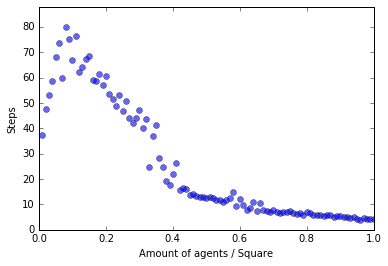

Maximum: 80.000000 steps, 0.080000 ratio


In [23]:
ratio = 0
maximum = 0
for i in range(0, len(data[1])):
    if data[1][i] > maximum:
        maximum = data[1][i]
        ratio = data[0][i] 

plt.plot(data[0], data[1], "bo", alpha=0.6, label="Lifetime")
plt.ylim([0, maximum * 1.1])
plt.xlabel("Amount of agents / Square")
plt.ylabel("Steps")
plt.show()

print("Maximum: %f steps, %f ratio" % (maximum, ratio))

# Запуск модели с различным соотношением количества агентов к площади и количества жертв к количеству хищников

In [24]:
number = 100
data = [[], [], []]

for i in range(1, 1 + number):
    for j in range(1, int(5000/number)):
        x = (2 * (5000 / number) * i) / (100*100)
        y = (j * i) / ((2 * 5000/number - j) * i)
        s = start_model("S", 100, 100, j * i, (2 * 5000/number - j) * i, 123)
        if s >= 0:
            data[0].append(x)
            data[1].append(y)
            data[2].append(s)

# Обработка полученных данных и построение графика зависимости времени жизни от исследуемых соотношений

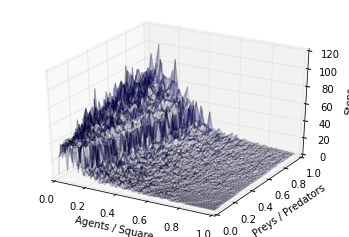

Maximum: 103 steps, 0.100000 agents/square, 0.960784 preys/predators


In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data[0], data[1], data[2], alpha=0.1)
ax.set_xlabel('Agents / Square')
ax.set_ylabel('Preys / Predators')
ax.set_zlabel('Steps')
plt.show()

maximum = 0
ratio1 = 0
ratio2 = 0
for i in range(0, len(data[2])):
    if data[2][i] > maximum:
        maximum = data[2][i]
        ratio1 = data[0][i]
        ratio2 = data[1][i]
        
print(("Maximum: %i steps, %f agents/square, %f preys/predators") % (maximum, ratio1, ratio2))